> This files contains the whole code fo the project in a well explained manner, _recommended to go through if you need to know **what** and **why** is everything working.

# Objective :
To build an explainable research prototype that simulates realistic agricultural data and studies how environmental and management factors influence crop yield, enabling controlled scenario-based yield analysis.

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

---

## 1. Generating synthetic data.
Finding the exact real data was not possible using open source so we need to simulate the real life data as close as possible.
- Data will be stored in : `data/syntheticData`

Data we need : **(tabular ONLY)**

| year | rainfall_mm | temperature_c | soil_index | irrigation_pct | fertilizer_kg_ha | pest_pressure_index | yield_kg_ha |
|------|-------------|---------------|------------|----------------|------------------|---------------------|-------------|
| x    | x           | x             | x          | x              | x                | x                   | x           |

- Setting parameters : _(we need random but consistent data)_ 

In [111]:
np.random.seed(123)
years = np.arange(2000,2025)
n_years = len(years)

---

### 1.a Rainfall :

Rainfall has three properties :
- High variability year to year
- Long term trends _(can be increasing or decreasing)_
- Occasional extreme years _(droughts/excess rain)_ 
- Physical Boundaries _(cannot be negative)_

We break rainfall into 4 components :
`Rainfall = Baseline + Trends + Normal Variability + Rare Shocks`
- Baseline              : Typical rainfall of the region    : `800 mm`
- Trend                 : Slow climate drift over time      : `-3 mm/year`
- Normal variability    : Year to year randomness           : `60 mm`
- Rare shocks           : Drought or extreme rainfall       : `+- 150 mm`

In [112]:
baseline_rainfall = 800

rainfall_trend = -3

normal_variability = np.random.normal( loc=0 , scale=60 , size=n_years )

extreme_events = np.zeros(n_years)
extreme_years = np.random.choice( n_years , size=2 , replace=False )
for i in extreme_years:
    extreme_events[i] = np.random.choice([-150,150])

rainfall_mm = ( baseline_rainfall + (rainfall_trend*(years - years[0])) + normal_variability + extreme_events)

rainfall_mm = np.clip( rainfall_mm , 300 , None )

##### OUTPUT : 

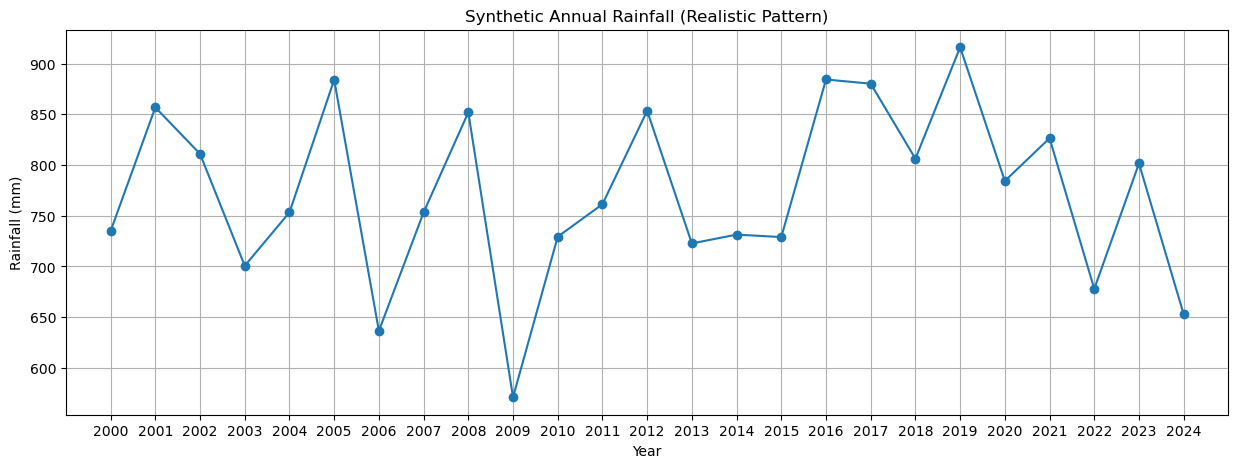

In [113]:
plt.figure(figsize=(15, 5))
plt.xticks(range(2000, 2025))
plt.xlim(1999,2025)
plt.grid(True)

plt.plot(years, rainfall_mm, marker="o")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.title("Synthetic Annual Rainfall (Realistic Pattern)")

plt.show()

---